In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, accuracy_score, classification_report
 


# Load and Check Data

In [2]:
# Read data from CSV file and create a dataframe
df = pd.read_csv("dataset/heart.csv") 

In [3]:
# Display the first few rows of the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# Display the column names in the dataframe
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Display the dimensions of the dataframe
df.shape 

(1025, 14)

## Feature Description

**Features:**

1. age: age in years

2. sex: (1 = male; 0 = female)

3. cp: chest pain type (4 values)

4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5. chol: serum cholestoral in mg/dl

6. fbs: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

7. restecg: resting electrocardiographic results (values 0,1,2)

8. thalach: maximum heart rate achieved

9. exang: exercise induced angina (1 = yes, 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest

11. slope: the slope of the peak exercise ST segment (0,1,2)

12. ca: number of major vessels (0-3) colored by flourosopy

13. thal: 1 = normal, 2 = fixed defect, 3 = reversable defect

14. target: 0 = no disease, 1 = disease

In [6]:
# Display information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


**Categorical Features:** sex, cp, fbs, restecg, exang, slope, ca, thal


**Numerical Features:** age, trestbps, chol, thalach, oldpeak

In [23]:
# Define lists of categorical and numerical features
categorical_feature_list = ["sex", "cp", "fbs","restecg", "exang", "slope", 
                            "ca", "thal"] # categorical features

numerical_feature_list = ["age", "trestbps", "chol",
                          "thalach", "oldpeak"] # numerical features

# Data Analysis

In [7]:
# Check for null values in each column of dataframe
df.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Remove rows with certain values in "ca" and "thal" columns
df.drop(df[df["ca"] == 4].index, inplace = True) 
df.drop(df[df["thal"] == 0].index, inplace = True) 

In [9]:
# Calculate basic statistics for each column in dataframe
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.607000,0.691000,0.934000,131.592000,246.996000,0.146000,0.52400,148.977000,0.338000,1.092400,1.381000,0.701000,2.339000,0.508000
std,9.037822,0.462312,1.031847,17.714326,51.700802,0.353283,0.52887,23.083139,0.473265,1.180727,0.619857,0.944718,0.593659,0.500186
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.00000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.00000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,277.000000,0.000000,1.00000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [10]:
df.shape

(1000, 14)

In [11]:
# Calculate mean value of "age" feature for target value
df[["target","age"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,age
0,0,56.689024
1,1,52.590551


In [12]:
# Calculate mean value of "trestbps" feature for target value
df[["target","trestbps"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,trestbps
0,0,134.168699
1,1,129.096457


In [13]:
# Calculate mean value of "thalach" feature for target value
df[["target","thalach"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,thalach
0,0,138.969512
1,1,158.669291


In [19]:
# Calculate mean value of "chol" feature for target value
df[["target","chol"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,chol
0,0,251.703252
1,1,242.437008


In [20]:
# Calculate mean value of "oldpeak" feature for target value
df[["target","oldpeak"]].groupby(["target"], as_index = False).mean().sort_values(by="target")

,target,oldpeak
0,0,1.614228
1,1,0.587008


* We see that numerical features are significantly different between target values, and we think that numerical features can help predict target values.

# Outlier Detection

In [21]:
# Function to detect outliers in dataset
def detect_outliers(df,features):
    outlier_indices = [] # Initialize list of outlier indices
    
    # Iterate over features
    for i in features:
        # Calculate 1st, 3rd quartiles and IQR
        Q1 = np.percentile(df[i],25) 
        Q3 = np.percentile(df[i],75) 
        IQR = Q3 - Q1 

        # Compute outlier step
        outlier_step = IQR * 1.5 

        # Determine indices of outliers in current feature
        outlier_list_col = df[(df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step)].index 

        # Append outlier indices to list
        outlier_indices.extend(outlier_list_col) 

    # Count number of outlier indices for each data point
    outlier_indices = Counter(outlier_indices)

    # Select rows with more than two outlier indices
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2) 

    # Return list of outlier indices
    return multiple_outliers

In [25]:
# Use function to find outliers in dataset
outlier_indices = detect_outliers(df, numerical_feature_list)
print("Outlier indices:", outlier_indices)

Outlier indices: []


Outlier indices: []


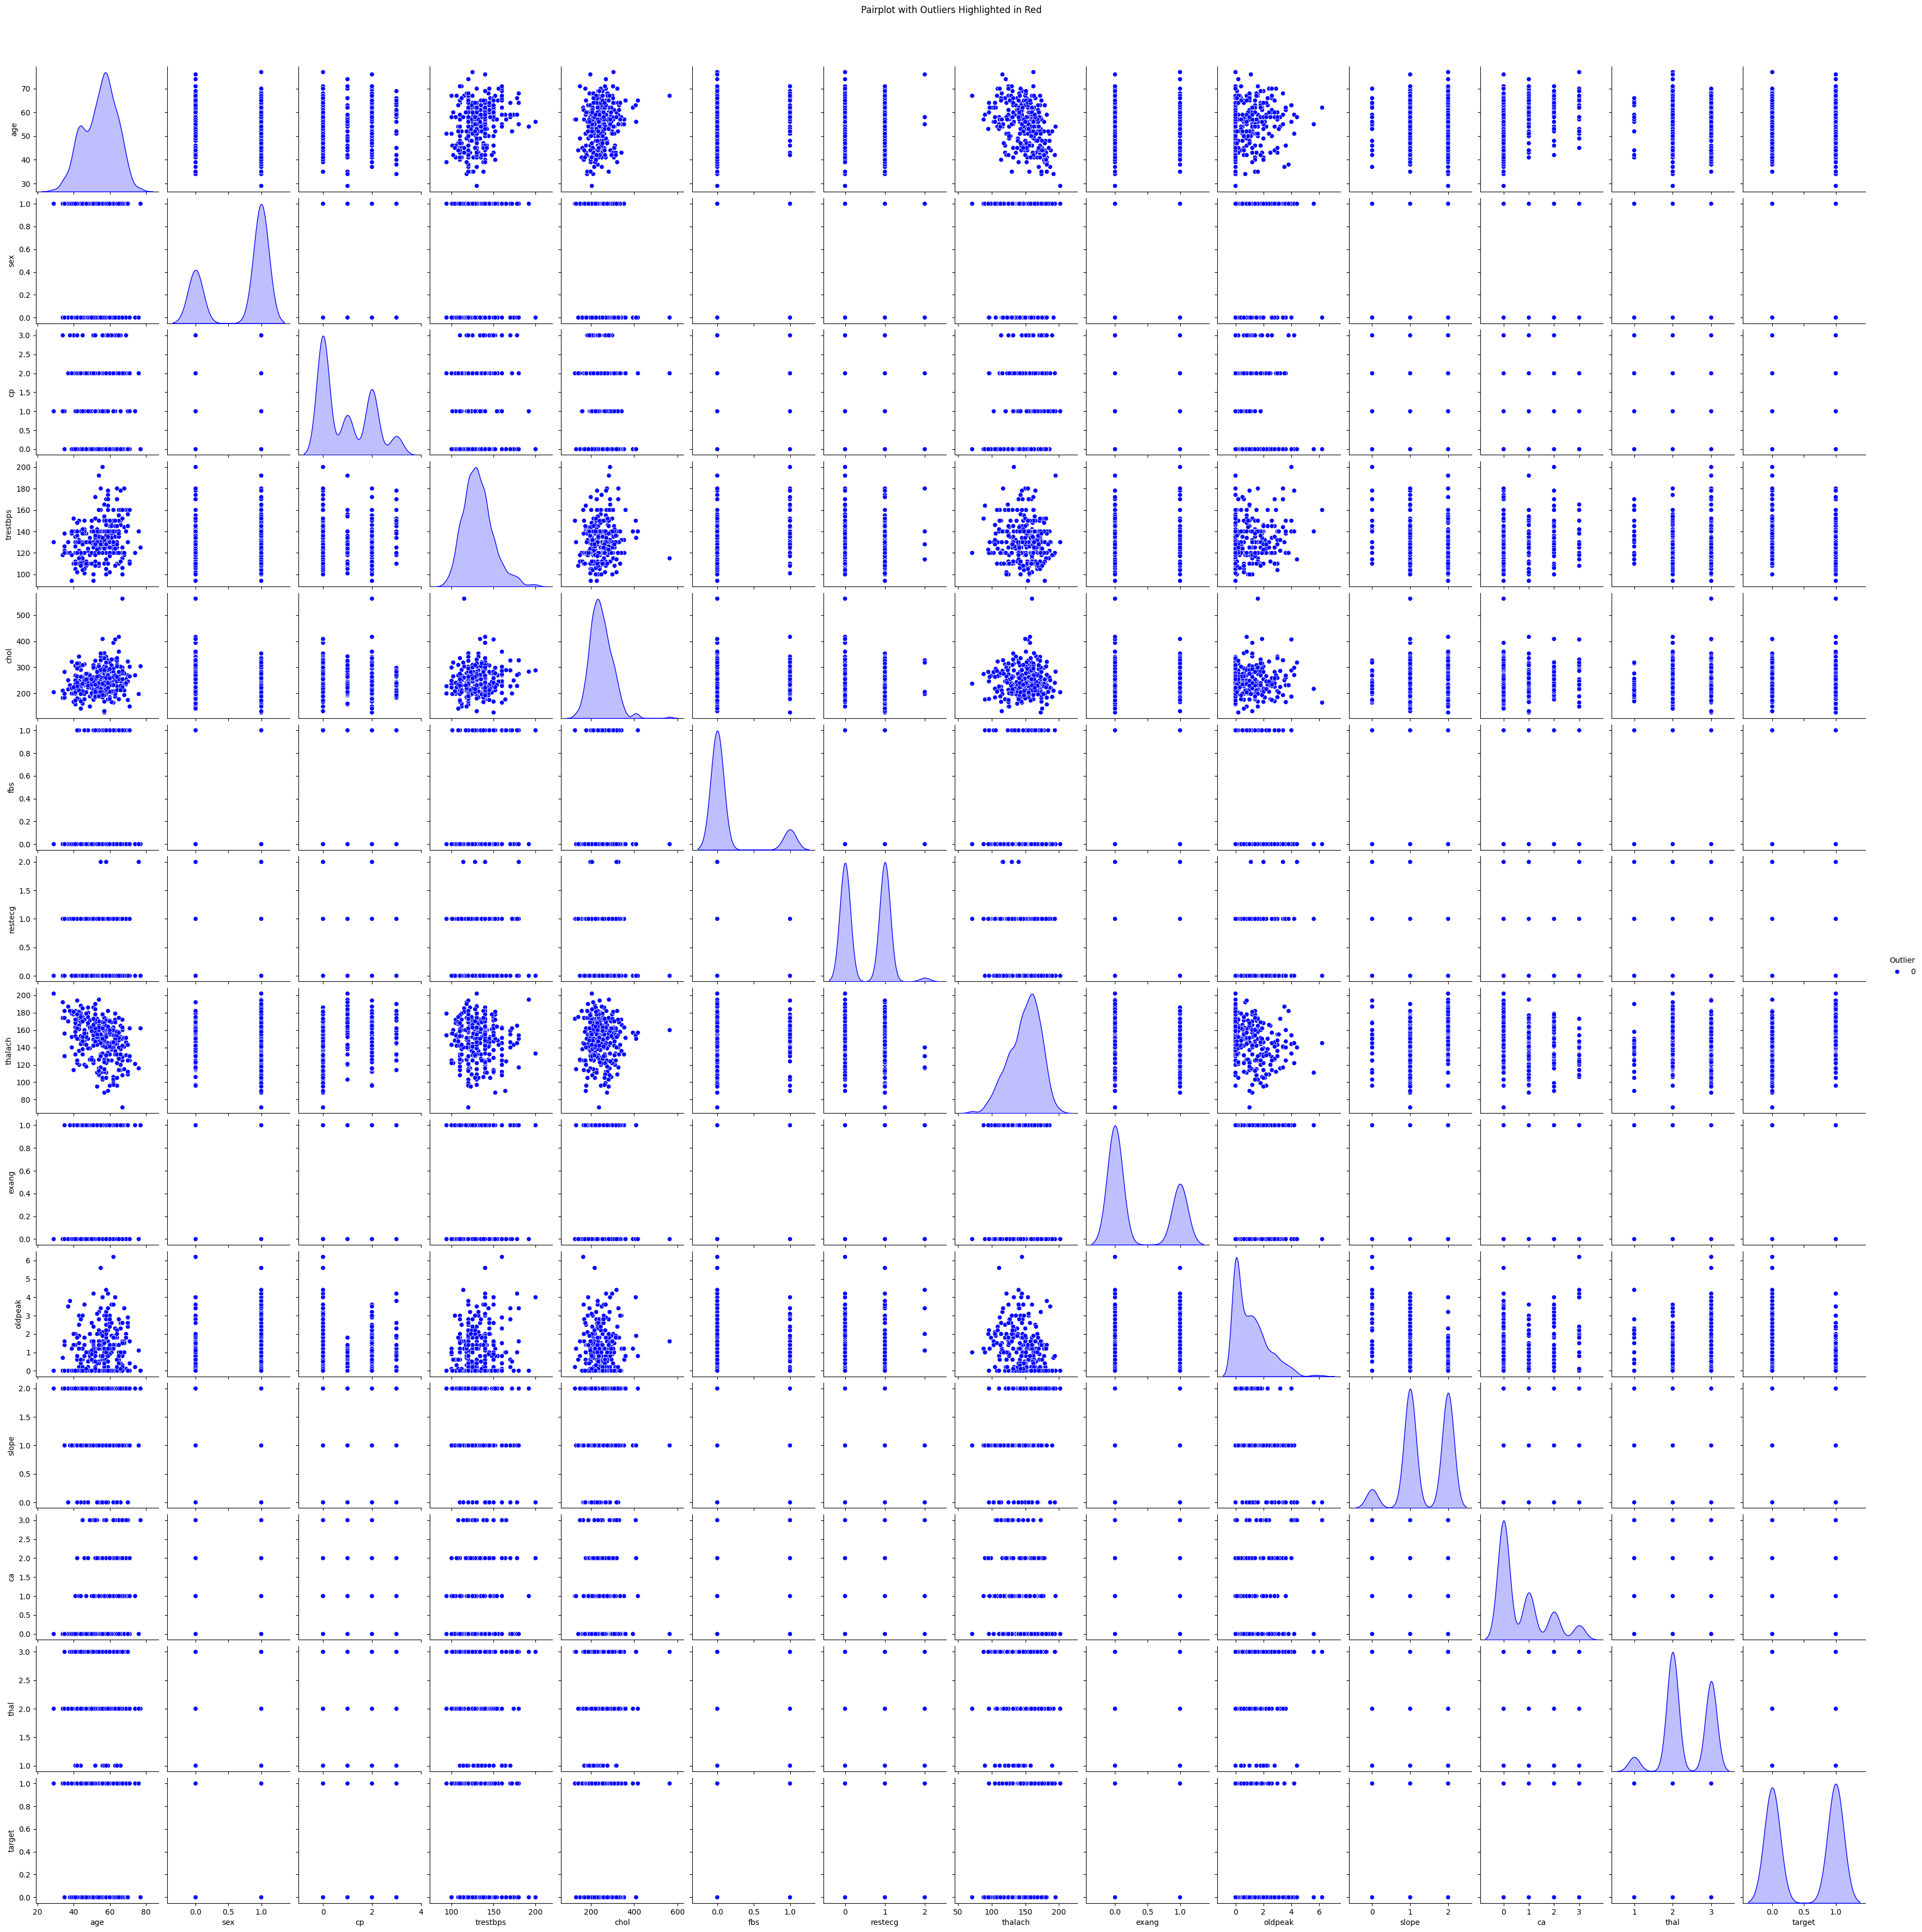

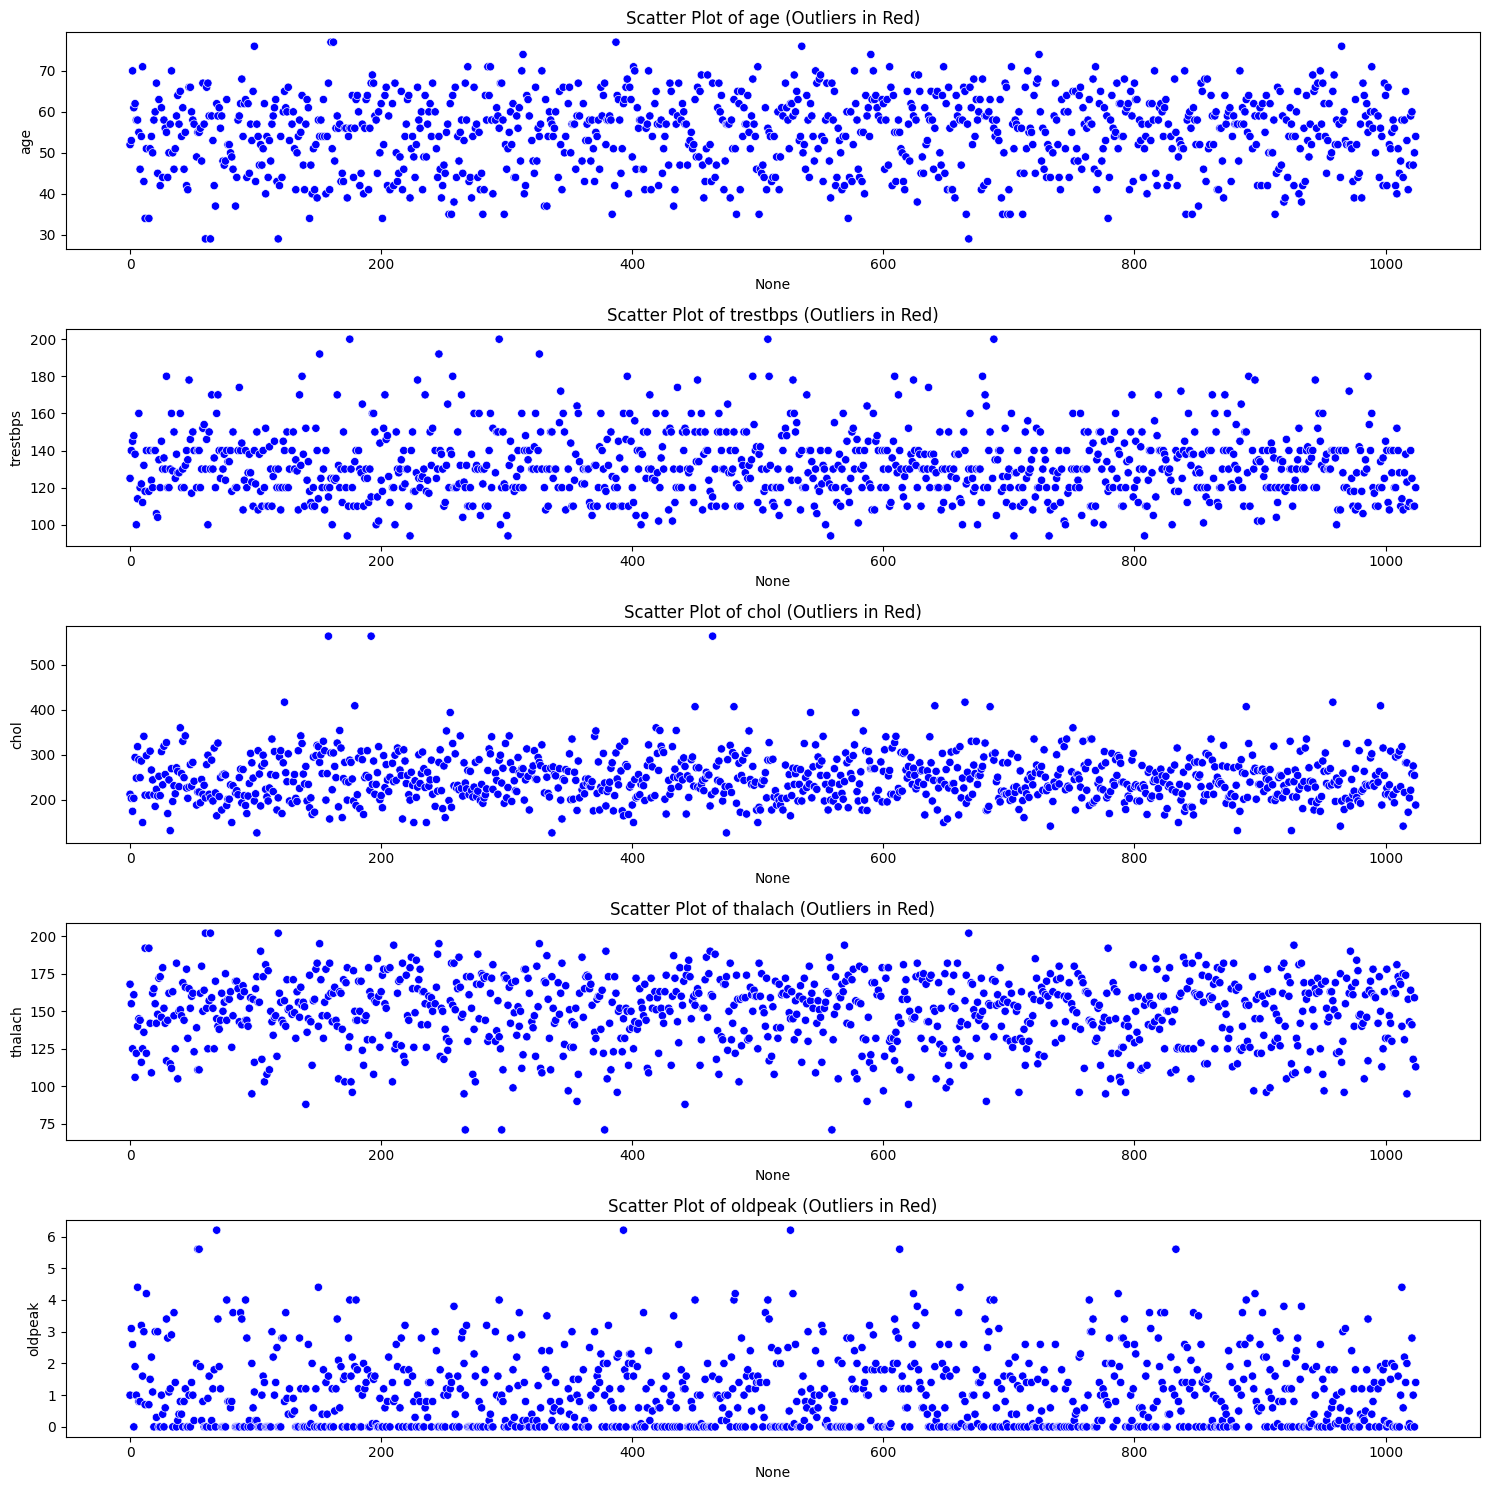

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trouver les indices des outliers
outlier_indices = detect_outliers(df, numerical_feature_list)
print("Outlier indices:", outlier_indices)

# Créer une colonne pour marquer les outliers
df['Outlier'] = 0
df.loc[outlier_indices, 'Outlier'] = 1  # Marque les outliers détectés avec 1

# Visualisation avec pairplot
sns.pairplot(df, hue='Outlier', palette={0: 'blue', 1: 'red'}, markers=['o', 's'])
plt.suptitle("Pairplot with Outliers Highlighted in Red", y=1.02)
plt.show()

# Visualisation des outliers pour chaque caractéristique avec scatter plot
def plot_outliers(df, features, outliers):
    plt.figure(figsize=(15, len(features) * 3))
    for i, feature in enumerate(features):
        plt.subplot(len(features), 1, i + 1)
        sns.scatterplot(data=df, x=df.index, y=feature, hue='Outlier', palette={0: 'blue', 1: 'red'}, legend=False)
        plt.title(f'Scatter Plot of {feature} (Outliers in Red)')
    plt.tight_layout()
    plt.show()

# Appel de la fonction pour les caractéristiques souhaitées
plot_outliers(df, numerical_feature_list, outlier_indices)


# Data Visualization

## Target Visualization

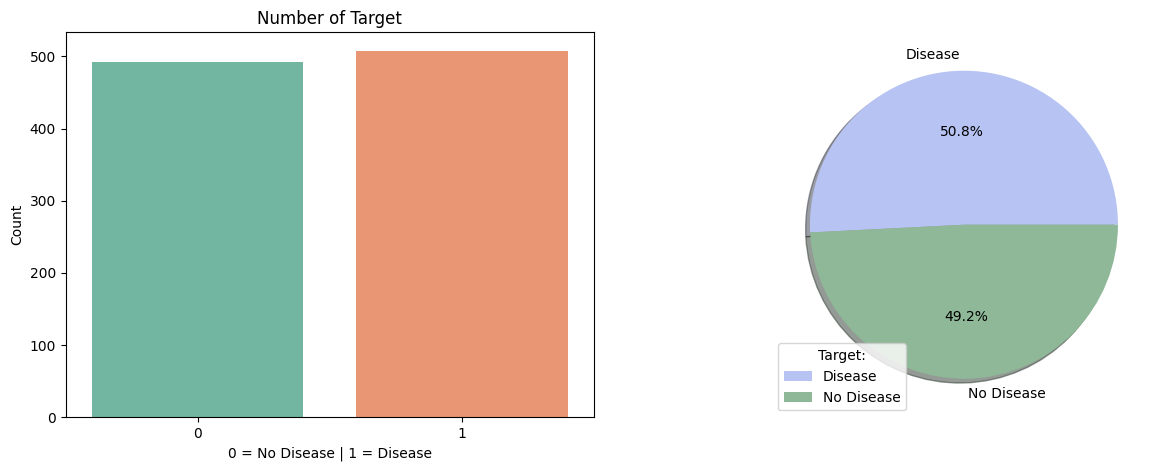

In [27]:
# Visualize number of target values in dataset
plt.figure(figsize=(15,5))

# Create bar plot showing count of target value
plt.subplot(1, 2, 1)
sns.countplot(x = "target", data = df, palette = "Set2")
plt.title("Number of Target")
plt.xlabel("0 = No Disease | 1 = Disease")
plt.ylabel("Count")

# Create pie chart showing proportion of target value
plt.subplot(1, 2, 2)
plt.pie(df["target"].value_counts(), labels = ["Disease", "No Disease"], shadow = True, autopct = "%1.1f%%", colors = ["#B7C3F3",  "#8EB897"])
plt.legend(title = "Target:")

# Display plots
plt.show()

* Data is balanced relative the target value.

## Categorical Feature Visualization

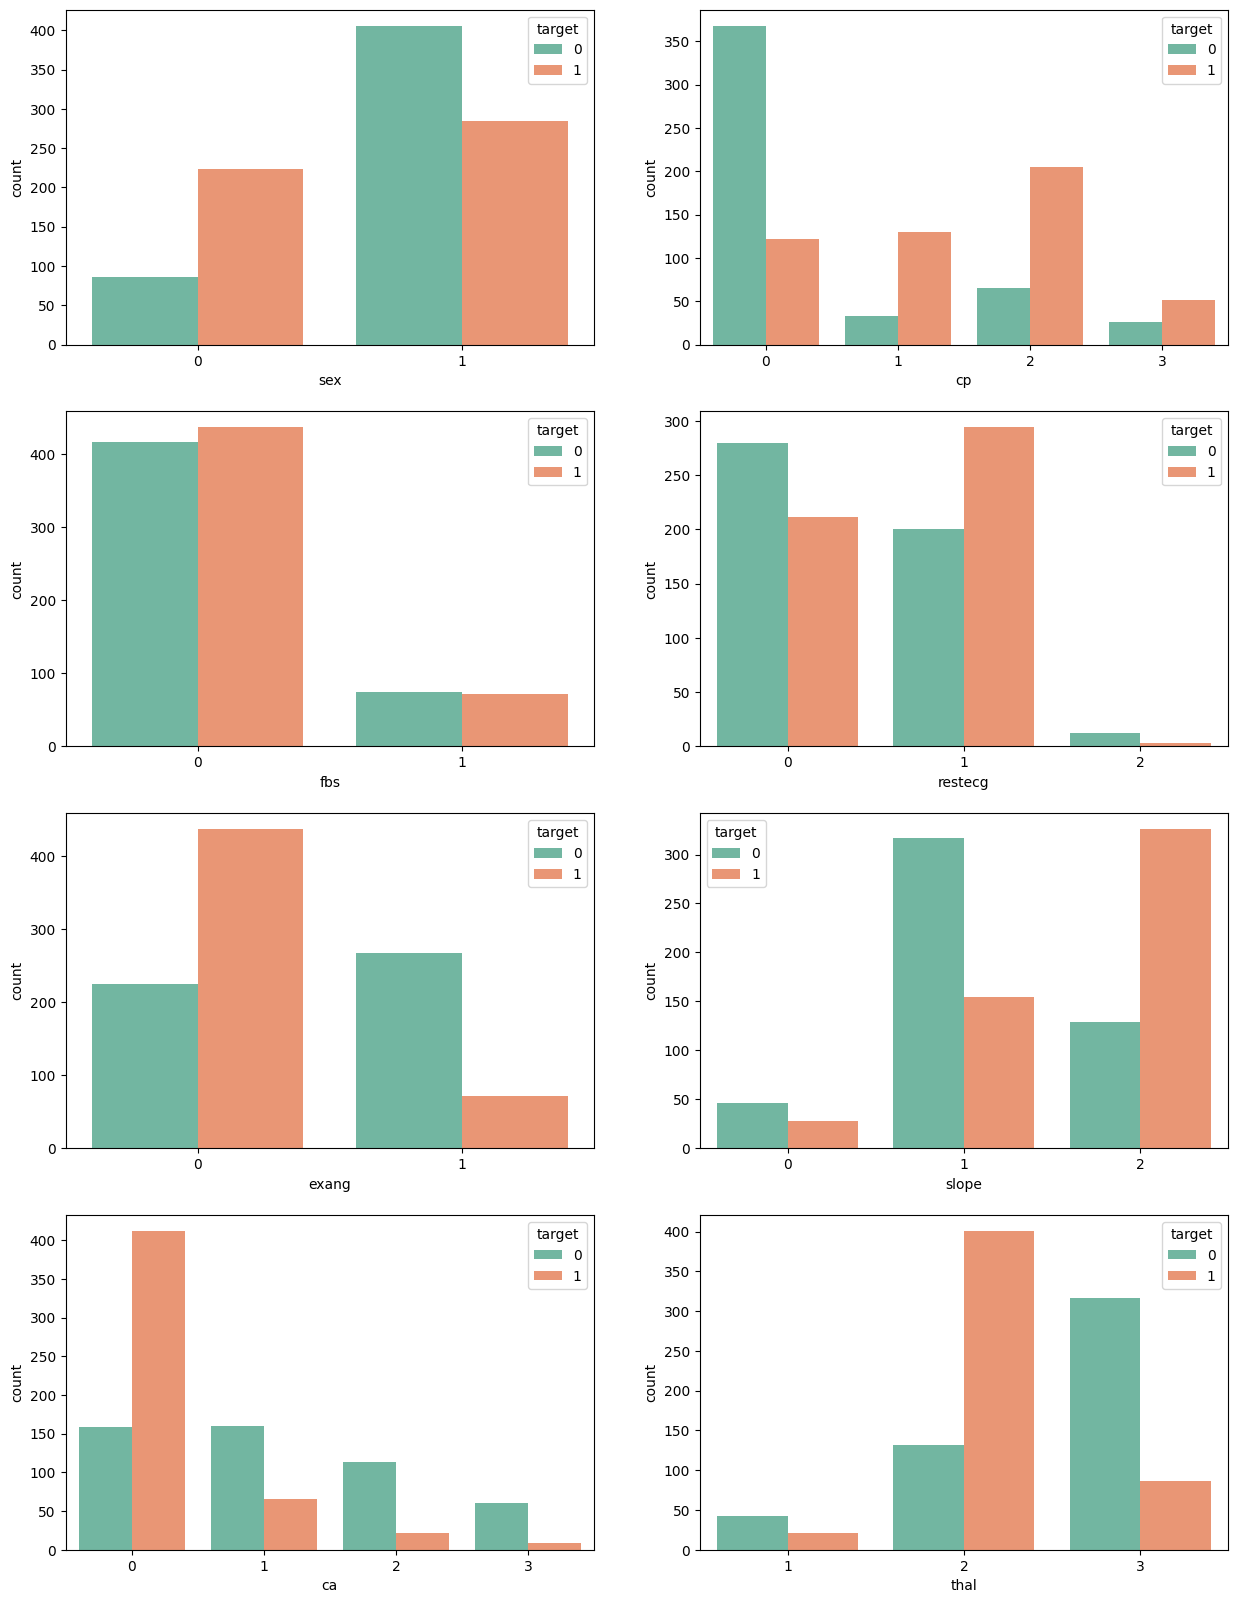

In [28]:
# Visualize distributions of categorical features by target value
i = 0
plt.figure(figsize=(15,20))

# Create plot for each categorical feature
for categorical_feature in categorical_feature_list:
    i += 1
    plt.subplot(4, 2, i)

    # Create countplot showing count of each category by target value
    sns.countplot(x = df[categorical_feature], data = df, hue = "target", palette = "Set2")

# Display plots    
plt.show()

* Women have a higher risk of heart disease than men.
* If cp -> typical angina the heart disease risk is very low.
* fbs may not be a distinctive feature for us.
* restecg -> 1 has a higher rate of heart disease than restecg -> 0 (There are few samples for restecg -> 2).
* exang -> 0 has a higher rate of heart disease than exang -> 1.
* slope -> 2 has a higher rate of heart disease than slope -> 1.
* ca -> 0, ca -> 1,2,3 It may be important to us because of the difference between.
* thal -> 2 has a higher rate of heart disease than thal -> 3.

## Numerical Feature Visualization

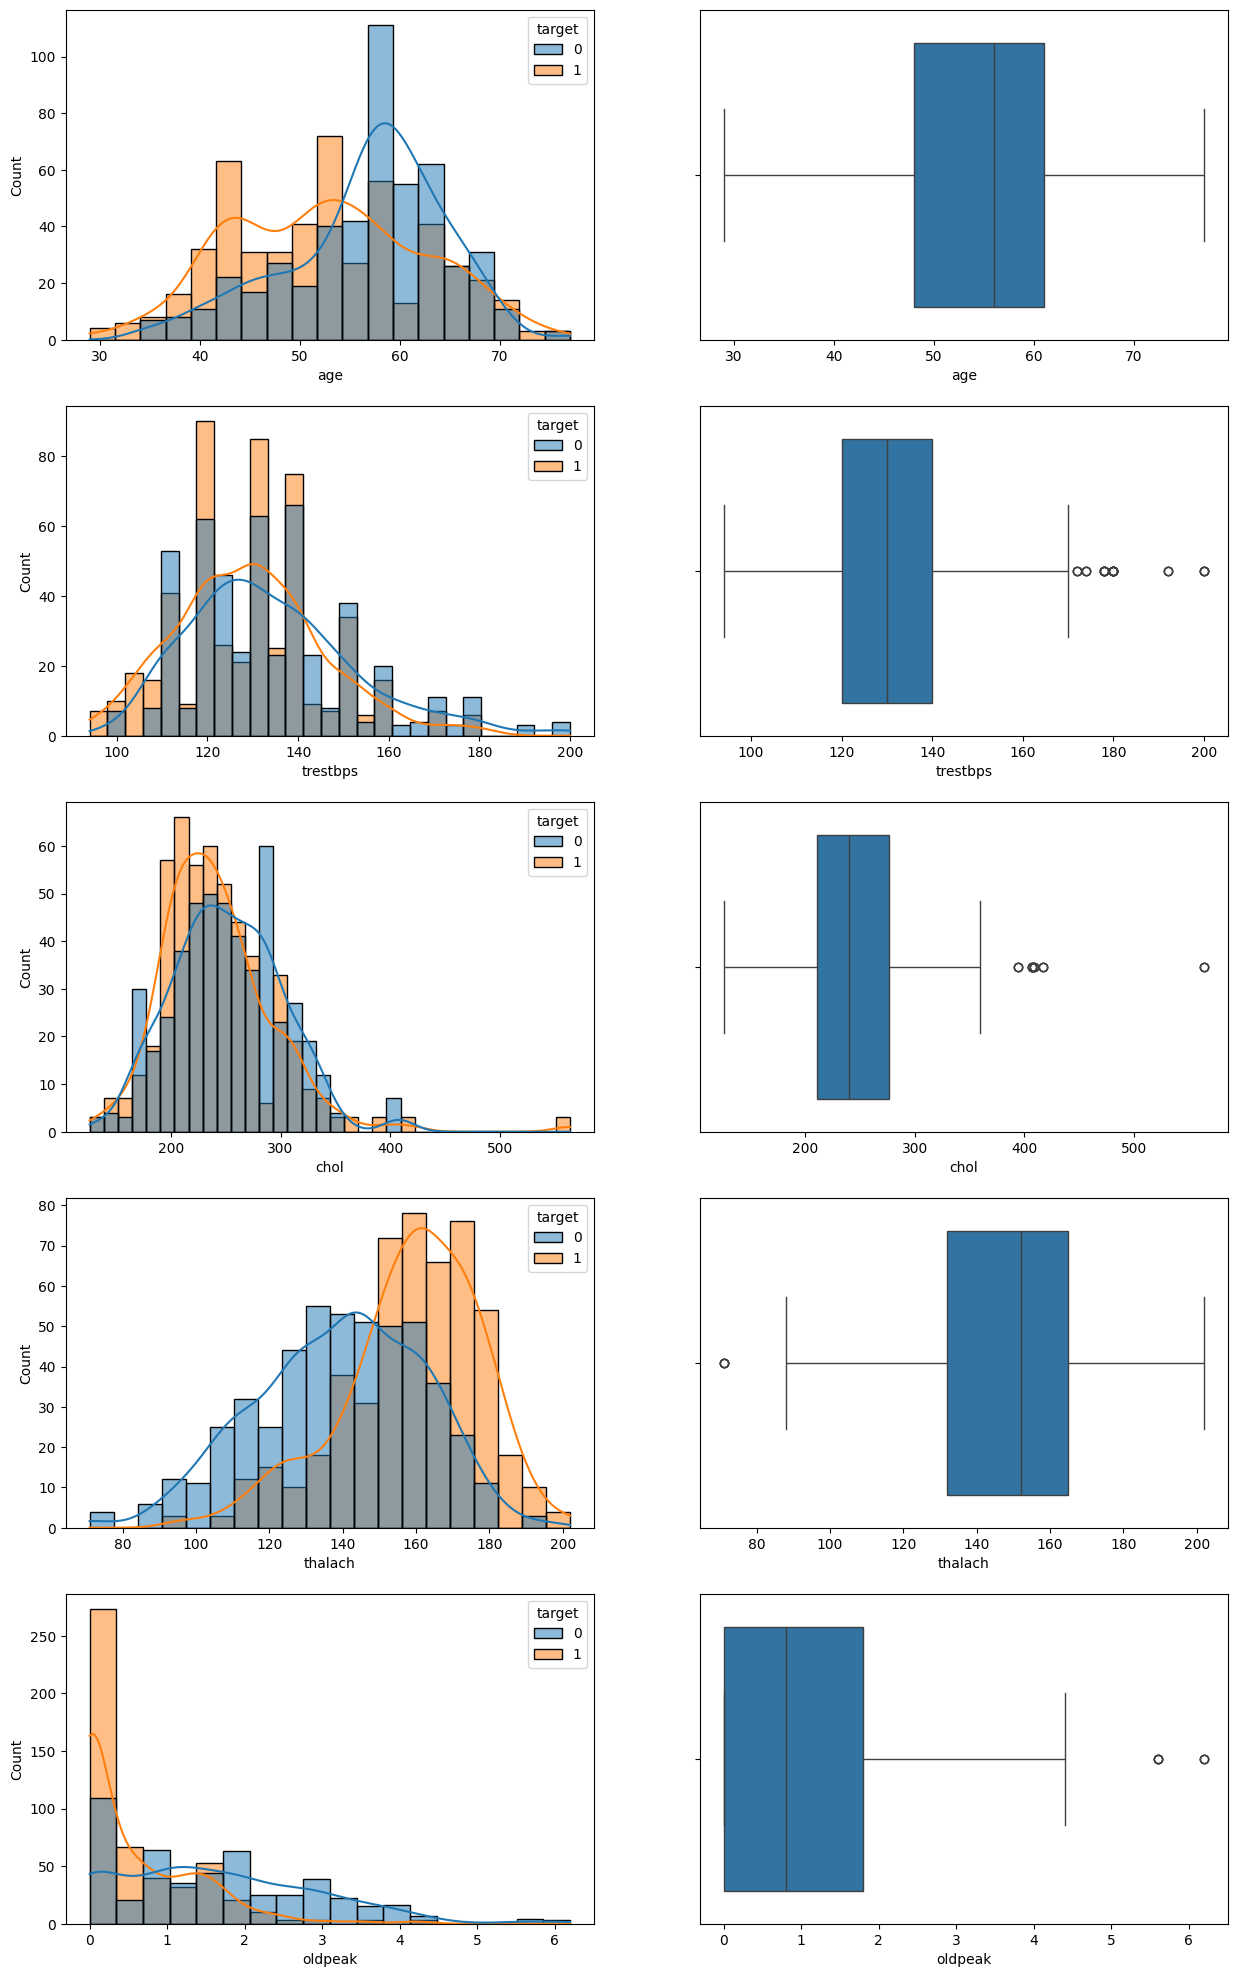

In [22]:
# Visualize distributions of numerical features by target value
i = 0
plt.figure(figsize=(15,30))

# Create two plots for each numerical feature
for numerical_feature in numerical_feature_list:

    i += 1
    plt.subplot(6, 2, i)
    # Create histogram showing distribution of feature values by target value
    sns.histplot(x = df[numerical_feature], data = df, kde = True, hue = "target")

    i += 1
    plt.subplot(6, 2, i)
    # Create boxplot showing distribution of feature values in general
    sns.boxplot(x = df[numerical_feature], data = df)
    
# Display plots   
plt.show()

* Data for oldpeak was found to be imbalanced.
* Some outliers were observed but we have already examined this situation in outlier detection.

## Correlation Matrix

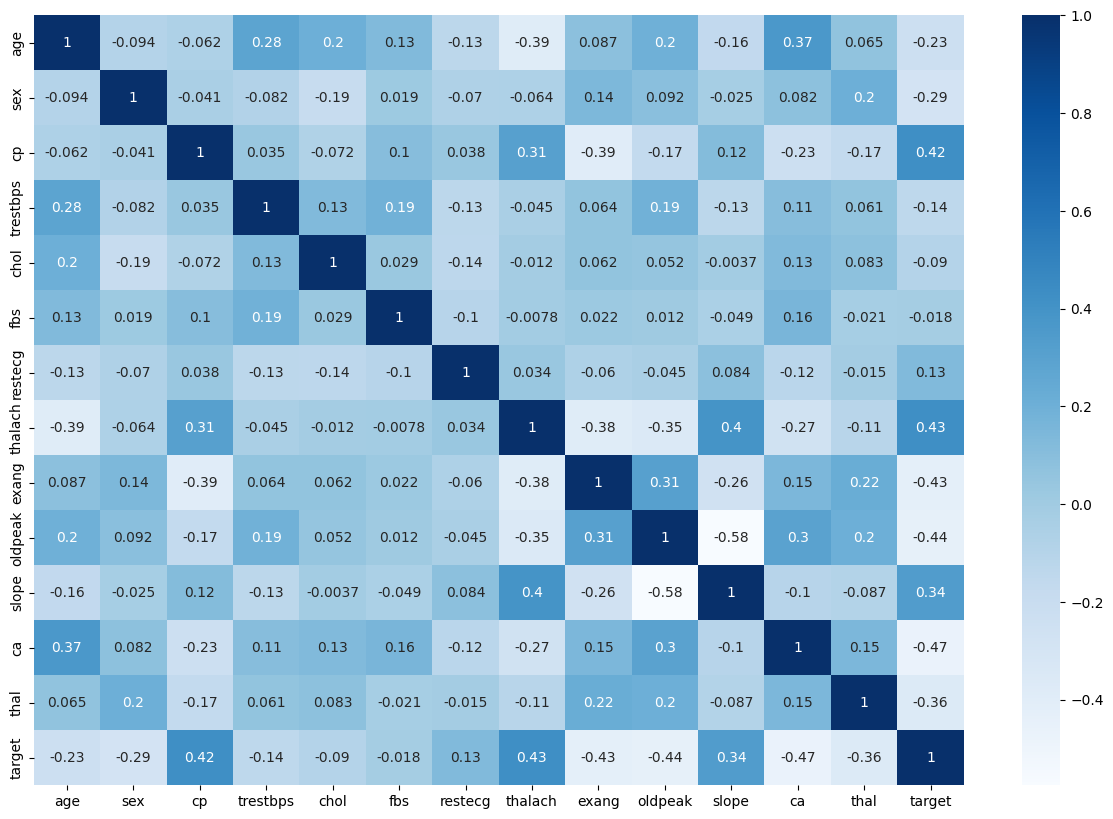

In [23]:
# Calculate correlation matrix for dataset
corr = df.corr()

# Create heatmap to visualize correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="Blues")

# Display heatmap
plt.show()

* target - cp, target - thalach, slope - thalach -> positive correlation

* ca - target, target - exang, oldpeak - target, slope - oldpeak -> negative correlation

# Feature Engineering

## Categorical Features

In [24]:
# Encode categorical features using the get_dummies function
df = pd.get_dummies(df, columns = categorical_feature_list)

* We converted categorical data to binary vector representations.

## Numerical Features

In [25]:
# Scale numerical features using the StandardScaler function
scaler = StandardScaler()
df[numerical_feature_list] = scaler.fit_transform(df[numerical_feature_list])

* The numeric values in the dataset were transformed to have a mean of 0 and a variance of 1.

# Modeling

## Splitting the Data

In [26]:
# Create variables for feature data and target values
X = df.drop(["target"], axis=1) # feature data
y = df["target"].values # target values

In [47]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 1024
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1000 non-null   float64
 1   trestbps   1000 non-null   float64
 2   chol       1000 non-null   float64
 3   thalach    1000 non-null   float64
 4   oldpeak    1000 non-null   float64
 5   sex_0      1000 non-null   bool   
 6   sex_1      1000 non-null   bool   
 7   cp_0       1000 non-null   bool   
 8   cp_1       1000 non-null   bool   
 9   cp_2       1000 non-null   bool   
 10  cp_3       1000 non-null   bool   
 11  fbs_0      1000 non-null   bool   
 12  fbs_1      1000 non-null   bool   
 13  restecg_0  1000 non-null   bool   
 14  restecg_1  1000 non-null   bool   
 15  restecg_2  1000 non-null   bool   
 16  exang_0    1000 non-null   bool   
 17  exang_1    1000 non-null   bool   
 18  slope_0    1000 non-null   bool   
 19  slope_1    1000 non-null   bool   
 20  slope_2    10

In [27]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 128) # %70 train data, %30 test data

# Print lengths of training and testing datasets for each feature and target variable
print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  700
X_test:  300
y_train:  700
y_test:  300


## Model Training and Parameter Tuning 

In [28]:
# Set the random seed
random_state = 128 

# Define the machine learning models
model = [LogisticRegression(random_state = random_state),
         DecisionTreeClassifier(random_state = random_state),
         SVC(random_state = random_state, probability=True),
         RandomForestClassifier(random_state = random_state),
         KNeighborsClassifier(),
         GaussianNB()] 

# Define the list of class names
model_names = ["LogisticRegression",
               "DecisionTreeClassifier",
               "SVM",
               "RandomForestClassifier",
               "KNeighborsClassifier",
               "NaiveBayes"]

# Define the hyperparameter grids for each model
lr_params = {"C": [0.1, 1, 10, 100], 
             "penalty": ["l1", "l2"]} 

dt_params = {"min_samples_split" : range(10,50,20),
             "max_depth": range(1,10,2)} 

svm_params = {"kernel" : ["rbf"],
              "gamma": [0.001, 0.01, 0.1],
              "C": [1,10,50,100,200]} 

rf_params = {"n_estimators":[100,200,300,400]}

knn_params = {"n_neighbors": [1,2,3,4,5,6,7,8,9,10],
              "weights": ["uniform","distance"],
              "metric":["euclidean","manhattan"]} 

nb_params = {"var_smoothing": np.logspace(0,-9, num=100)} 

# Define a list of hyperparameter grids
param_grids = [lr_params,
               dt_params,
               svm_params,
               rf_params,
               knn_params,
               nb_params] 

In [30]:
# Define two list to store the results and estimators
cv_result = []
best_estimators = []

# Iterate over the models and their hyperparameter grids
for i in range(len(model)):

    # Define the stratified K-fold cross-validation scheme
    cv = StratifiedKFold(n_splits = 5)
    
    # Define the grid search strategy
    clf = GridSearchCV(model[i], 
                       param_grid=param_grids[i], 
                       cv = cv, 
                       scoring = "accuracy", 
                       n_jobs = -1,
                       verbose = 1)
    
    # Print the cross validation score, best parameters and the train and test accuracy of the model
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)

    print("Machine Learning Models:", model_names[i])
    print("Cross Validation Scores:", cv_result[i])
    print("Best Parameters:", best_estimators[i])
    print("\n-----------------------------------------------------\n")

    print("Train Accuracy of Classifier: ", accuracy_score(clf.predict(X_train),y_train))
    print("Test Accuracy of Classifier: ", accuracy_score(clf.predict(X_test),y_test))
    print("The F1 Score of Classifier: ", f1_score(clf.predict(X_test), y_test))
    print("\n-----------------------------------------------------\n")

    # Print the classification report and plot the ROC curve and confusion matrix
    print("Classification Report: \n", classification_report(y_test, clf.predict(X_test)))
    print("\n-----------------------------------------------------\n")
    

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Machine Learning Models: LogisticRegression
Cross Validation Scores: 0.8671428571428571
Best Parameters: LogisticRegression(C=0.1, random_state=128)

-----------------------------------------------------

Train Accuracy of Classifier:  0.8685714285714285
Test Accuracy of Classifier:  0.87
The F1 Score of Classifier:  0.8704318936877077

-----------------------------------------------------

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.82      0.87       159
           1       0.82      0.93      0.87       141

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.87      0.87       300


-----------------------------------------------------

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Machine Learning Models: DecisionTreeClassifier
Cross Validation Scores: 0.90

In [34]:
# Identify the best model based on the highest cross-validation score
best_index = cv_result.index(max(cv_result))
best_model = best_estimators[best_index]

print("Best Model:", model_names[best_index])
print("Best Model Cross Validation Score:", cv_result[best_index])
print("Best Model Parameters:", best_model)

Best Model: KNeighborsClassifier
Best Model Cross Validation Score: 0.9871428571428572
Best Model Parameters: KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')


## Model Evaluation

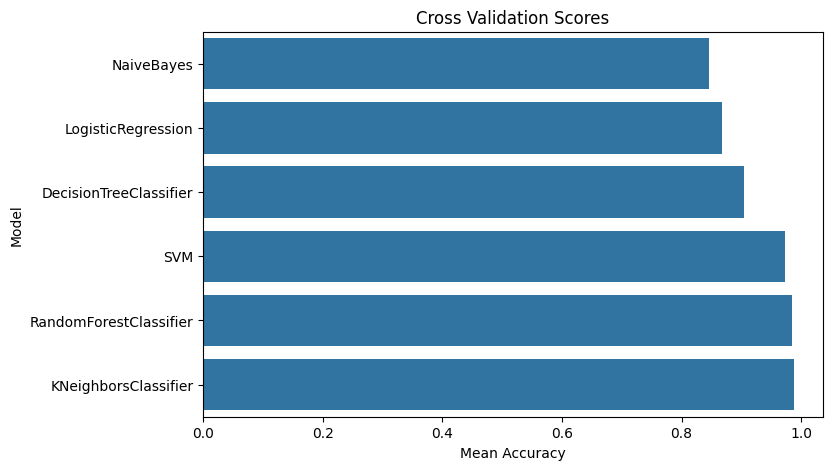

In [33]:
# Create dataframe with mean accuracy scores for each model
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, 
                           "Model":["LogisticRegression",
                                    "DecisionTreeClassifier", 
                                    "SVM",
                                    "RandomForestClassifier",
                                    "KNeighborsClassifier",
                                    "NaiveBayes"]}).sort_values(by="Cross Validation Means")

# Create barplot to visualize mean accuracy scores for each model
plt.figure(figsize=(8,5))
g = sns.barplot(x="Cross Validation Means", y="Model", data=cv_results)

# Set x-axis label and plot title
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

# Display plot
plt.show()

* Considering the relations between the features in our data set and this table, it was concluded that the best algorithm is the KNN algorithm.

In [ ]:
import joblib
# Save the best model
joblib.dump(best_model, '/app/best_model.joblib')
print("Best model saved as 'best_model.joblib'")

Best model saved as 'best_model.joblib'
